In [1]:
# autoreload magic
%load_ext autoreload
%autoreload 2

In [2]:
from utils import load_psf_and_image
from utils import plot_image
from utils import to_absolute_path

In [3]:
ORIGINAL_IMAGE = "data/lensed/im172.npy"
DIFFUSER_IMAGE = "data/diffuser/im172.npy"
PSF = "data/psf.tiff"

psf, image = load_psf_and_image(psf_fp=to_absolute_path(PSF),
                                data_fp=to_absolute_path(DIFFUSER_IMAGE),
                                downsample=4, flip=True, normalize=True)

psf.shape

(1, 270, 480, 3)

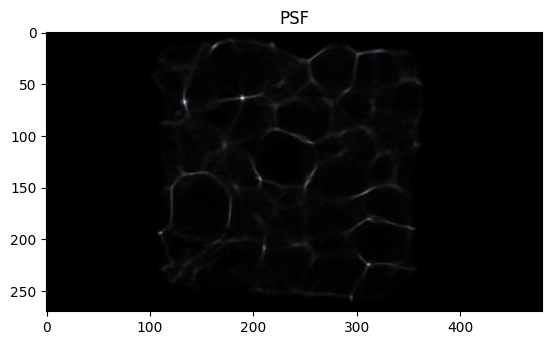

In [4]:
from matplotlib import pyplot as plt

# plt.imshow(psf[0])  # will show a black image, needs gamma correction
plot_image(psf[0])
plt.title("PSF")
plt.show()

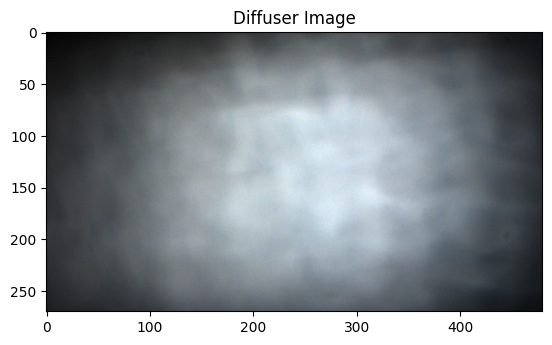

In [5]:
plot_image(image)
plt.title("Diffuser Image")
plt.show()

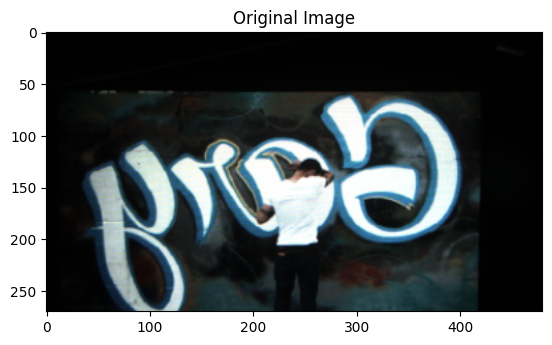

In [6]:
from utils import load_image

original = load_image(to_absolute_path(ORIGINAL_IMAGE))  #, shape=reconstructed.shape)
plot_image(original)
plt.title('Original Image')
plt.show()

100%|██████████| 50/50 [00:39<00:00,  1.28it/s]


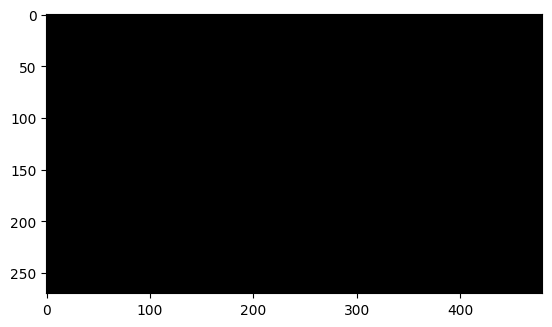

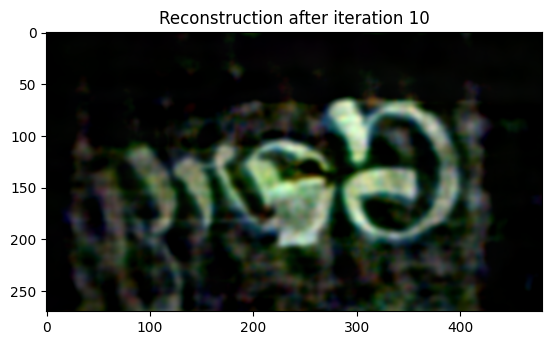

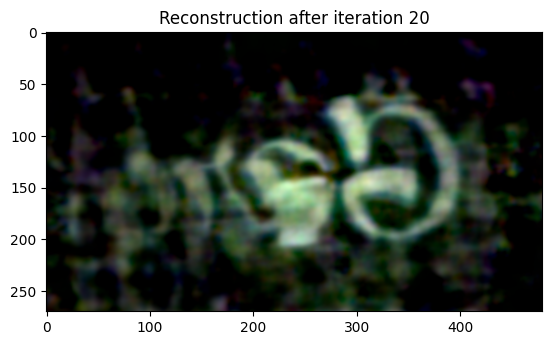

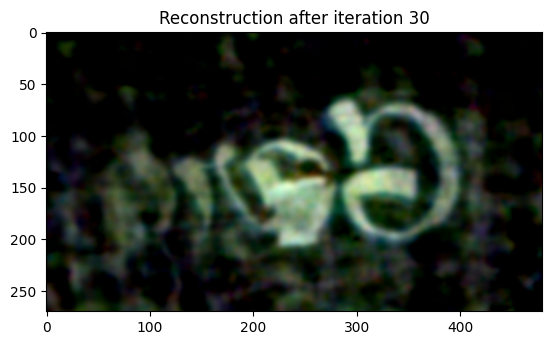

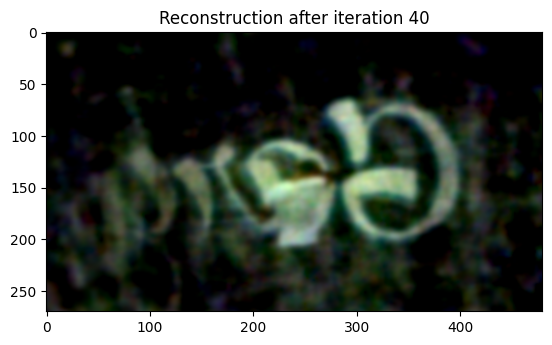

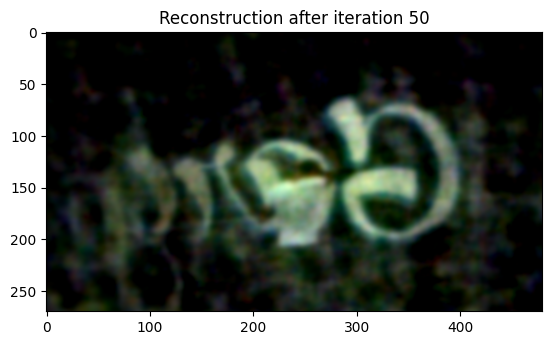

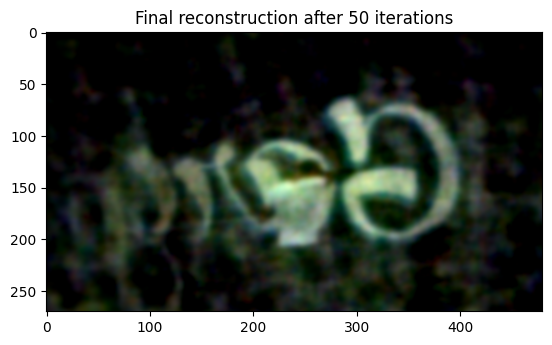

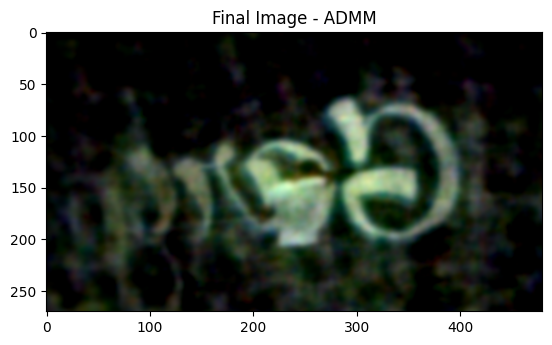

In [34]:
from algorithms.admm import ADMM

original = load_image(to_absolute_path(ORIGINAL_IMAGE))  #, shape=reconstructed.shape)

reconstructor = ADMM(psf, gt=original)
reconstructed, axs, metrics = reconstructor.apply(image, n_iter=50, disp_iter=10, eval_iter=1)
plot_image(reconstructed[0]).set_title("Final Image - ADMM")
plt.show()

Text(0.5, 0, 'Iteration')

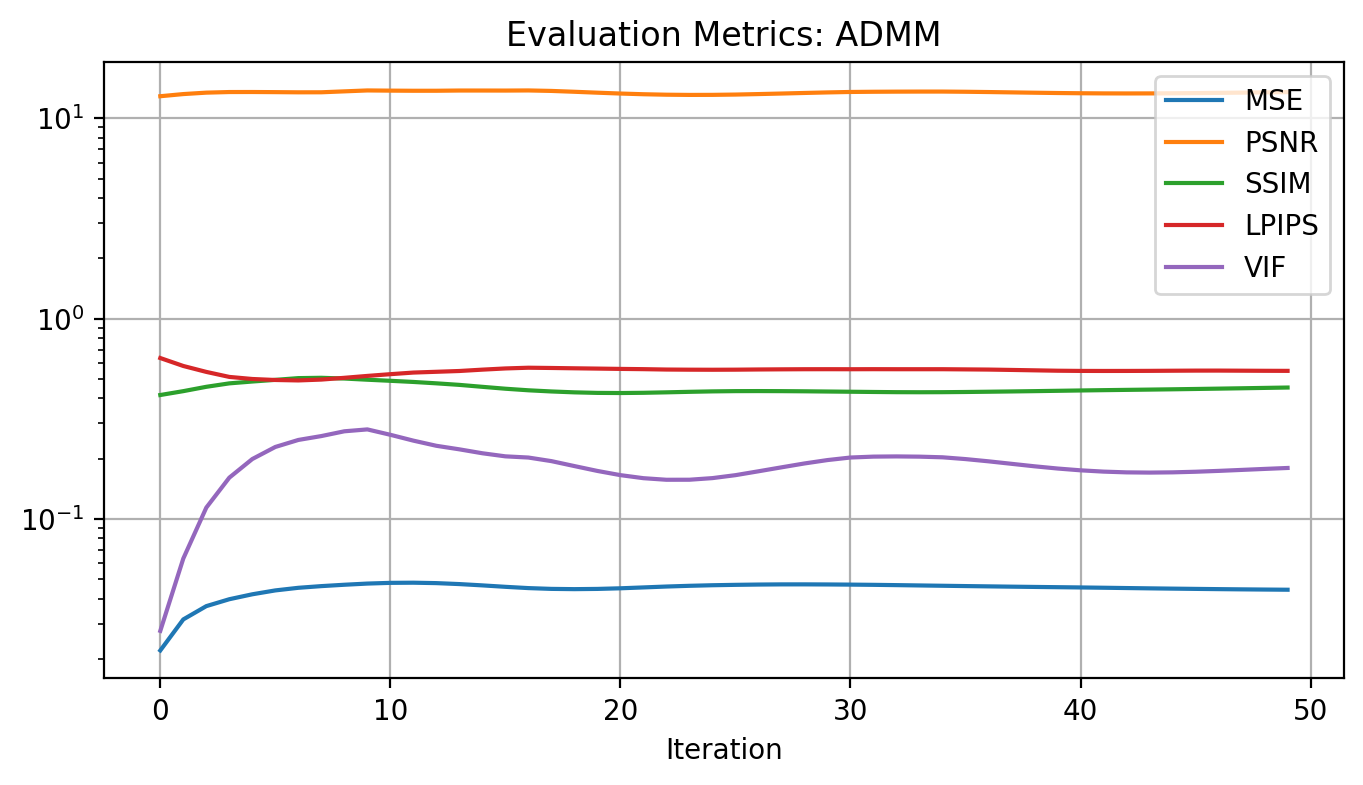

In [36]:
plt.figure(figsize=(8, 4), dpi=200)

eval_names = ['MSE', 'PSNR', 'SSIM', 'LPIPS', 'VIF']
for i, e in enumerate(metrics):
    plt.plot(metrics[i], label=eval_names[i])
    
plt.legend()
plt.yscale('log')
plt.grid()
plt.title('Evaluation Metrics: ADMM')
plt.xlabel('Iteration')